## Cleaning

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import io

df = pd.read_csv('/content/listings2.csv')
df.head()

,url,availibility,description,price,acres,APN,coords,taxes,images
0,na,Available,A,10000,1.30,NaN,"37.461616227634998, -105.683320999147000",200,https://i.imgur.com/iCDyPAt.jpg
1,na,Available,A,12500,1.50,NaN,"42.339419999999997, -121.412554999999998",200,https://i.imgur.com/uxArVYT.jpg
2,na,Available,A,20000,2.30,NaN,"37.461616227634998, -105.683320999147000",166,https://i.imgur.com/gqe3YNH.jpg
3,na,Available,A,5000,0.45,NaN,"34.989519999999999, -108.317621000000003",200,https://i.imgur.com/NjXDi6S.jpg
4,https://www.landwatch.com/cocke-county-tenness...,Available,"Parcel Number: 034K-B-041.06, Cocke County TN\...",13900,1.00,NaN,"36.013060000000003, -83.032934999999995",200,https://assets.landwatch.com/resizedimages/0/2...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           1693 non-null   object 
 1   availibility  1693 non-null   object 
 2   description   1693 non-null   object 
 3   price         1693 non-null   int64  
 4   acres         1693 non-null   float64
 5   APN           242 non-null    object 
 6   coords        1693 non-null   object 
 7   taxes         1693 non-null   int64  
 8   images        1693 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [4]:
import numpy as np

df['availibility'].value_counts()

Available    1693
Name: availibility, dtype: int64

In [5]:
df.drop(['APN', 'url', 'availibility', 'description'],  axis=1)

,price,acres,coords,taxes,images
0,10000,1.30,"37.461616227634998, -105.683320999147000",200,https://i.imgur.com/iCDyPAt.jpg
1,12500,1.50,"42.339419999999997, -121.412554999999998",200,https://i.imgur.com/uxArVYT.jpg
2,20000,2.30,"37.461616227634998, -105.683320999147000",166,https://i.imgur.com/gqe3YNH.jpg
3,5000,0.45,"34.989519999999999, -108.317621000000003",200,https://i.imgur.com/NjXDi6S.jpg
4,13900,1.00,"36.013060000000003, -83.032934999999995",200,https://assets.landwatch.com/resizedimages/0/2...
...,...,...,...,...,...
1688,1400,0.37,"33.044682000000002, -116.864205999999996",200,https://assets.landwatch.com/resizedimages/0/2...
1689,13500,1.36,"34.555218000000004, -84.654518999999993",200,https://assets.landwatch.com/resizedimages/0/2...
1690,15000,0.30,"34.133270000000003, -89.915375999999995",200,https://assets.landwatch.com/resizedimages/0/2...
1691,14900,2.00,"43.717708000000002, -85.861318999999995",200,https://assets.landwatch.com/resizedimages/0/2...


In [6]:
import re
import pandas as pd

pattern = r',.*'

def chop_text(s):
    return re.sub(pattern, '', s)

df['images'] = df['images'].apply(chop_text)

In [7]:
df['images'][0]

'https://i.imgur.com/iCDyPAt.jpg'

## Image URL -> Tensor

In [8]:
from PIL import Image
import torch 
import re 
from transformers import  ViTFeatureExtractor 
import urllib.request
import requests


device='cpu'
encoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
decoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
model_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
feature_extractor = ViTFeatureExtractor.from_pretrained(encoder_checkpoint)


response = requests.get('https://i.imgur.com/iCDyPAt.jpg')
with open('temp.jpg', 'wb') as f:
        f.write(response.content)

image = Image.open('temp.jpg')
image = image.convert('RGB')
image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)

image

/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tensor([[[[ 0.4588,  0.4667,  0.4745,  ...,  0.1451,  0.1373,  0.1451],
          [ 0.4353,  0.4510,  0.4667,  ...,  0.1529,  0.1529,  0.1608],
          [ 0.4353,  0.4353,  0.4510,  ...,  0.1608,  0.1608,  0.1686],
          ...,
          [-0.0902, -0.0667, -0.2157,  ..., -0.1216,  0.0667, -0.0118],
          [-0.1373, -0.0824, -0.0431,  ..., -0.0824,  0.0118,  0.0902],
          [-0.1059, -0.0667, -0.1059,  ...,  0.0588,  0.0902,  0.2000]],

         [[ 0.5765,  0.5686,  0.5686,  ...,  0.2471,  0.2549,  0.2627],
          [ 0.5529,  0.5608,  0.5608,  ...,  0.2627,  0.2706,  0.2784],
          [ 0.5529,  0.5529,  0.5529,  ...,  0.2784,  0.2784,  0.2863],
          ...,
          [-0.0902, -0.0745, -0.2235,  ..., -0.1059,  0.0588, -0.0353],
          [-0.1373, -0.0980, -0.0588,  ..., -0.0588,  0.0118,  0.0667],
          [-0.1137, -0.0824, -0.1216,  ...,  0.0902,  0.0824,  0.1686]],

         [[ 0.7255,  0.7098,  0.7020,  ...,  0.3804,  0.4039,  0.4118],
          [ 0.7098,  0.7020,  

In [9]:
print(len(image[0][0]))
print(len(image[0]))
image[0][0]

224
3


tensor([[ 0.4588,  0.4667,  0.4745,  ...,  0.1451,  0.1373,  0.1451],
        [ 0.4353,  0.4510,  0.4667,  ...,  0.1529,  0.1529,  0.1608],
        [ 0.4353,  0.4353,  0.4510,  ...,  0.1608,  0.1608,  0.1686],
        ...,
        [-0.0902, -0.0667, -0.2157,  ..., -0.1216,  0.0667, -0.0118],
        [-0.1373, -0.0824, -0.0431,  ..., -0.0824,  0.0118,  0.0902],
        [-0.1059, -0.0667, -0.1059,  ...,  0.0588,  0.0902,  0.2000]])

In [10]:
df['images']

0                         https://i.imgur.com/iCDyPAt.jpg
1                         https://i.imgur.com/uxArVYT.jpg
2                         https://i.imgur.com/gqe3YNH.jpg
3                         https://i.imgur.com/NjXDi6S.jpg
4       https://assets.landwatch.com/resizedimages/0/2...
                              ...                        
1688    https://assets.landwatch.com/resizedimages/0/2...
1689    https://assets.landwatch.com/resizedimages/0/2...
1690    https://assets.landwatch.com/resizedimages/0/2...
1691    https://assets.landwatch.com/resizedimages/0/2...
1692    https://assets.landwatch.com/resizedimages/0/2...
Name: images, Length: 1693, dtype: object

## Tensor -> Caption

In [11]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image


model_name = "bipin/image-caption-generator"

# load model
model = VisionEncoderDecoderModel.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained("gpt2")

device = 'cpu'
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, 

In [12]:
encoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
decoder_checkpoint = "nlpconnect/vit-gpt2-image-captioning"
model_checkpoint = "nlpconnect/vit-gpt2-image-captioning"

tokenizer = AutoTokenizer.from_pretrained(decoder_checkpoint)
model = VisionEncoderDecoderModel.from_pretrained(model_checkpoint).to(device)

### Sample

tensor([[[[ 0.4588,  0.4667,  0.4745,  ...,  0.1451,  0.1373,  0.1451],
          [ 0.4353,  0.4510,  0.4667,  ...,  0.1529,  0.1529,  0.1608],
          [ 0.4353,  0.4353,  0.4510,  ...,  0.1608,  0.1608,  0.1686],
          ...,
          [-0.0902, -0.0667, -0.2157,  ..., -0.1216,  0.0667, -0.0118],
          [-0.1373, -0.0824, -0.0431,  ..., -0.0824,  0.0118,  0.0902],
          [-0.1059, -0.0667, -0.1059,  ...,  0.0588,  0.0902,  0.2000]],

         [[ 0.5765,  0.5686,  0.5686,  ...,  0.2471,  0.2549,  0.2627],
          [ 0.5529,  0.5608,  0.5608,  ...,  0.2627,  0.2706,  0.2784],
          [ 0.5529,  0.5529,  0.5529,  ...,  0.2784,  0.2784,  0.2863],
          ...,
          [-0.0902, -0.0745, -0.2235,  ..., -0.1059,  0.0588, -0.0353],
          [-0.1373, -0.0980, -0.0588,  ..., -0.0588,  0.0118,  0.0667],
          [-0.1137, -0.0824, -0.1216,  ...,  0.0902,  0.0824,  0.1686]],

         [[ 0.7255,  0.7098,  0.7020,  ...,  0.3804,  0.4039,  0.4118],
          [ 0.7098,  0.7020,  

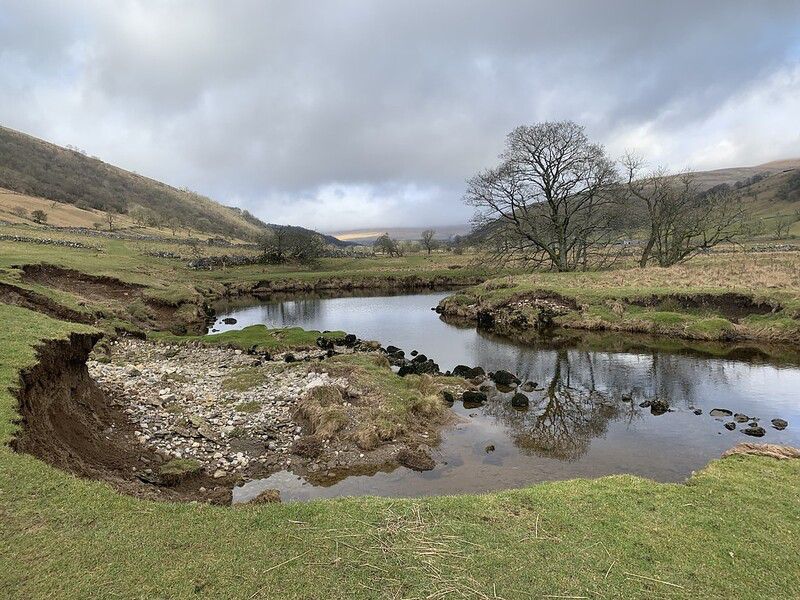

In [13]:
def predict(image,max_length=128, num_beams=4):
  img = Image.open(image)
  if img.mode != 'RGB':
      img = img.convert(mode="RGB")
  pixel_values = feature_extractor(images=[img], return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)
  clean_text = lambda x: x.replace('<|endoftext|>','').split('\n')[0]
  output_ids = model.generate(pixel_values, num_beams=num_beams, max_length=max_length)
  preds = tokenizer.decode(output_ids[0], skip_special_tokens=True)
  print(pixel_values)
  print(len(pixel_values[0][0]))
  print(len(pixel_values[0]))

  return preds 

print(predict('test.jpg', 128, 4))
Image.open('test.jpg')

### Pipeline for CSV

In [14]:
df = df.head(4)

In [15]:
# import requests

# def process_image(row):
#     response = requests.get(row['images'])
#     with open('temp.jpg', 'wb') as f:
#         f.write(response.content)

#     image = Image.open('temp.jpg')
#     image = image.convert('RGB')
#     image = feature_extractor(image, return_tensors="pt").pixel_values.to(device)

#     return image

# df['images'] = df.apply(process_image, axis=1)


In [16]:
def image_caption(row):
    response = requests.get(row['images'])
    with open('temp.jpg', 'wb') as f:
        f.write(response.content)  
    image_desc = predict('temp.jpg', 128, 4)
    return image_desc
  
df['captions'] = df.apply(image_caption, axis=1)


tensor([[[[ 0.4588,  0.4667,  0.4745,  ...,  0.1451,  0.1373,  0.1451],
          [ 0.4353,  0.4510,  0.4667,  ...,  0.1529,  0.1529,  0.1608],
          [ 0.4353,  0.4353,  0.4510,  ...,  0.1608,  0.1608,  0.1686],
          ...,
          [-0.0902, -0.0667, -0.2157,  ..., -0.1216,  0.0667, -0.0118],
          [-0.1373, -0.0824, -0.0431,  ..., -0.0824,  0.0118,  0.0902],
          [-0.1059, -0.0667, -0.1059,  ...,  0.0588,  0.0902,  0.2000]],

         [[ 0.5765,  0.5686,  0.5686,  ...,  0.2471,  0.2549,  0.2627],
          [ 0.5529,  0.5608,  0.5608,  ...,  0.2627,  0.2706,  0.2784],
          [ 0.5529,  0.5529,  0.5529,  ...,  0.2784,  0.2784,  0.2863],
          ...,
          [-0.0902, -0.0745, -0.2235,  ..., -0.1059,  0.0588, -0.0353],
          [-0.1373, -0.0980, -0.0588,  ..., -0.0588,  0.0118,  0.0667],
          [-0.1137, -0.0824, -0.1216,  ...,  0.0902,  0.0824,  0.1686]],

         [[ 0.7255,  0.7098,  0.7020,  ...,  0.3804,  0.4039,  0.4118],
          [ 0.7098,  0.7020,  

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean(text):
        text = text.lower()
  
        text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])

        lemmatizer = WordNetLemmatizer()
        words = [word for word in text.split() if word not in stopwords.words("english")]
        
        text = " ".join(words)
    
        return text

df['captions'] = df['captions'].apply(lambda x: clean(x))

In [19]:
image_captions = df['captions']
image_captions

0       river surrounded tall grass
1           lake bunch birds flying
2       mountain range many flowers
3    river mountains mountain range
Name: captions, dtype: object

## Recommendation

* get user inputs including (range of budget: min-max, acres: min-max, taxes (?), coordinates, user text description)
* drop all plots from consideration that are beyond min-max for budget, and acres (manually add bounds to user input on front-end)
* match captions of land with user descriptions

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

user_input = "i want grassy land with water nearby"

df_2 = pd.DataFrame({'user_input': [user_input]})
df_2['user_input'] = df_2['user_input'].apply(clean)

vectorizer = CountVectorizer()
text_vectors = vectorizer.fit_transform([user_input] + image_captions)

cos_similarities = cosine_similarity(text_vectors[0:1], text_vectors[0:])

for i, caption in enumerate(image_captions):
    print(f"Cosine similarity between user input and '{caption}': {cos_similarities[0][i]}")

Cosine similarity between user input and 'river surrounded tall grass': 1.0000000000000002
Cosine similarity between user input and 'lake bunch birds flying': 0.5555555555555556
Cosine similarity between user input and 'mountain range many flowers': 0.5555555555555556
Cosine similarity between user input and 'river mountains mountain range': 0.6666666666666667


In [22]:
user_min = 10000
user_max = 15000

user_min2 = 1
user_max2 = 2


for i, caption in enumerate(image_captions):

  cos_similarities = cosine_similarity(text_vectors[0:1], text_vectors[0:])
  df['cos_similarity'] = cos_similarities[0]


filtered_df = df[(df['price'] >= user_min) & (df['price'] <= user_max) & (df['acres'] >= user_min2) & (df['acres'] <= user_max2)]
filtered_df

,url,availibility,description,price,acres,APN,coords,taxes,images,captions,cos_similarity
0,na,Available,A,10000,1.3,NaN,"37.461616227634998, -105.683320999147000",200,https://i.imgur.com/iCDyPAt.jpg,river surrounded tall grass,1.000000
1,na,Available,A,12500,1.5,NaN,"42.339419999999997, -121.412554999999998",200,https://i.imgur.com/uxArVYT.jpg,lake bunch birds flying,0.555556
